# 로지스틱 회귀

회귀: 연속적인 값 예측<BR>
분류: 정해진 몇 개의 값 중 예측

선형회귀는 예외적인 데이터에 민감하게 반응하기 때문에 분류에는 사용하지 않음.

로지스틱 회귀는 데이터에 가장 잘 맞는 시그모이드 함수를 찾음.

시그모이드 함수: S(x) = 1/1+e^(-x)<br>
무조건 0과 1사이의 값을 리턴하는 함수<br>
S(INF) = 1, S(-INF) = 0

보통 0.5를 기준으로 분류함. 

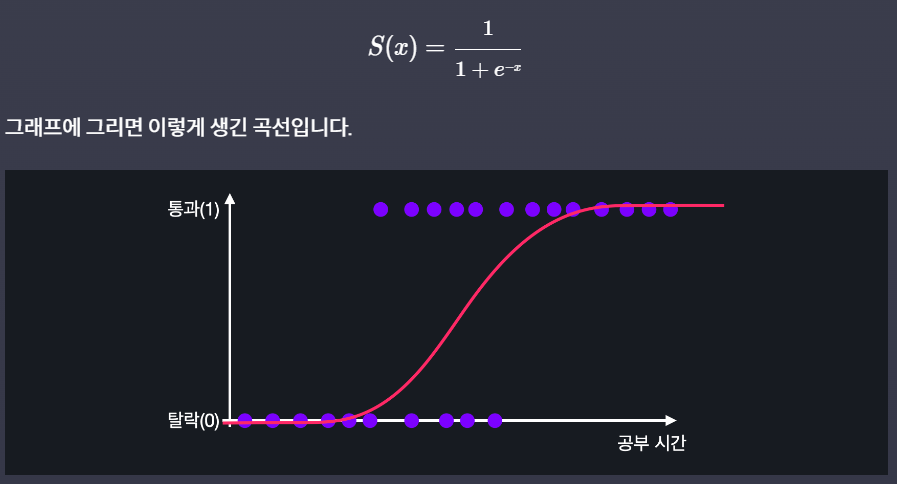

로지스틱 회귀 가설함수: 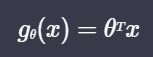
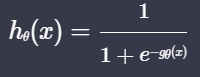
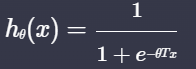

#### 로지스틱 회귀: 
입력변수들을 조절해가면서 적절한 세타값을 찾아서 데이터에 맞는 시그모이드 함수를 찾는 과정

#### 변수가 한 개일 때:
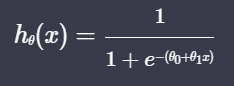
theta0를 늘릴수록 곡선이 왼쪽으로 이동, theta1을 늘릴수록 곡석이 조여짐.
#### 변수가 여러 개라면 시각화하기가 힘들어진다.

### 로지스틱 회귀 손실 함수: 
로그 손실(log-loss / cross entropy)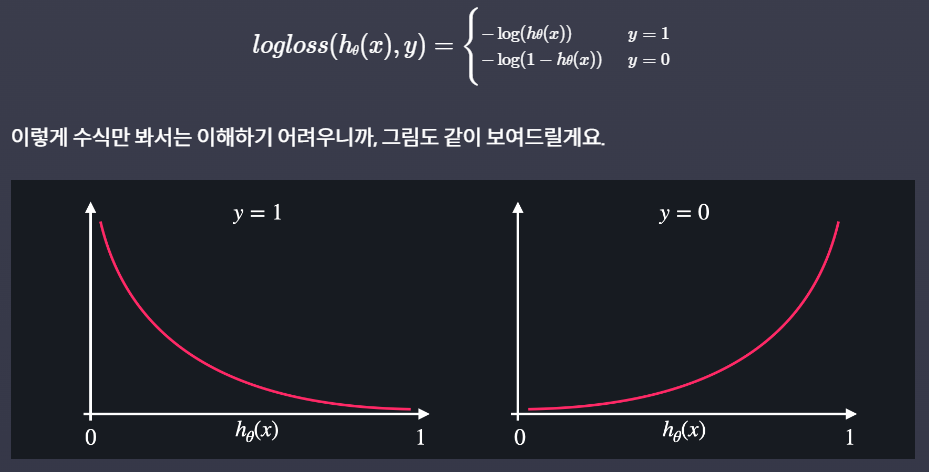
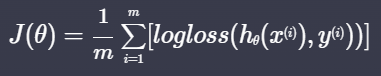
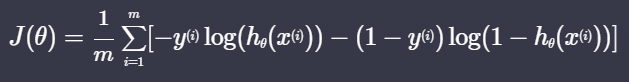

### 로지스틱 회귀 경사 하강법
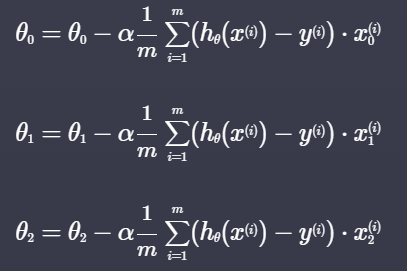
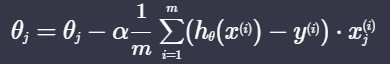
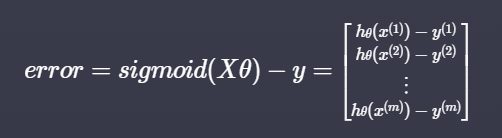
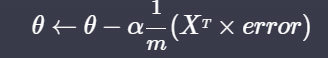

# 로지스틱 회귀 경사 하강법 구현하기

In [1]:
import numpy as np

def sigmoid(x):
    """시그모이드 함수"""
    return 1 / (1 + np.exp(-x))
    
    
def prediction(X, theta):
    """로지스틱 회귀 가정 함수"""
    return sigmoid(X@theta)


def gradient_descent(X, theta, y, iterations, alpha):
    """로지스틱 회귀 경사 하강 알고리즘"""
    m = len(X)  # 입력 변수 개수 저장

    for _ in range(iterations):
        # 코드를 쓰세요
        error = prediction(X,theta) - y
        theta = theta - alpha/m*(X.T@error)
            
    return theta
    
    
# 입력 변수
hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 목표 변수
passed = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])  # 시험 통과 여부 (0: 탈락, 1:통과)

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 입력 변수 y 정의
y = passed

theta = [0, 0, 0, 0]  # 파라미터 초기값 설정
theta = gradient_descent(X, theta, y, 300, 0.1)  # 경사 하강법을 사용해서 최적의 파라미터를 찾는다
theta

array([-1.35280508,  1.61640725, -1.83666046, -0.60286277])

# 분류가 3개 이상일 때

각각의 분류에 대해서 가설함수를 구하고 각각의 입력변수를 각각의 가설함수에 넣은 값이 가장 큰 값이 도출되는 것으로 분류함. (확률이 가장 큰 것으로 분류함)

# 로지스틱 회귀 실습

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

In [5]:
iris_data = load_iris()

In [6]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = pd.DataFrame(iris_data.target, columns = ['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [20]:
y_train = y_train.values.ravel()

In [25]:
# solver = 알고리즘정하기, max_iter = 경사하강 횟수 (단, 낮을 수도 있음) 
model = LogisticRegression(solver='saga', max_iter= 2000)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [29]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [28]:
model.score(X_test, y_test)

0.9666666666666667

# 로지스틱 회귀로 와인 종류 분류하기

In [40]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd  

wine_data = datasets.load_wine()
""" 데이터 셋을 살펴보는 코드
print(wine_data.DESCR)
"""

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(wine_data.target, columns=['Y/N'])

# 코드를 쓰세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
y_train = y_train.values.ravel()
logistic_model = LogisticRegression(solver='saga', max_iter=7500)
logistic_model.fit(X_train, y_train)
y_test_predict = logistic_model.predict(X_train)

# 테스트 코드
score = logistic_model.score(X_test, y_test)
y_test_predict, score

(array([0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1,
        0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0,
        0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
        1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1,
        0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2,
        1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 2, 0, 1, 2, 1, 1]),
 0.75)